In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [0]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

import numpy as np
import keras 
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

In [19]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [0]:
path = '/content/gdrive/My Drive/THI'

In [21]:
import pandas as pd
emotion = pd.read_csv(path + '/emotion.csv')
emotion.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
import numpy as np
def reshape_string_listofnumber(df, index):
  string = df[index]
  string = string.split(' ')
  lst = np.array([int(charac) for charac in string])

  return lst

def reshape_dataset_matrix(df):
  matrix = np.empty((df.shape[0], 48, 48, 1))
  for i in range(df.shape[0]):
    ele = reshape_string_listofnumber(df, i)
    ele = np.reshape(ele,(48,48,1))
    matrix[i] = ele

  return matrix

In [0]:
X_train = emotion.pixels[emotion.Usage == 'Training']
X_test = emotion.pixels[emotion.Usage == 'PrivateTest'].reset_index(drop = True)

X_train = reshape_dataset_matrix(X_train)
X_test = reshape_dataset_matrix(X_test)

In [24]:
X_train.max()

255.0

In [25]:
X_test.max()

255.0

In [0]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [27]:
X_train.shape, X_test.shape

((28709, 48, 48, 1), (3589, 48, 48, 1))

In [33]:
# CNN Autoencoder:

autoencoder = Sequential()

autoencoder.add(Conv2D(16,(3,3), activation='relu', padding='same', input_shape = X_train.shape[1:]))
autoencoder.add(MaxPool2D((2,2), padding = 'same'))
autoencoder.add(Conv2D(8, (3,3), activation='relu', padding = 'same'))
autoencoder.add(MaxPool2D((2,2), padding = 'same'))
autoencoder.add(Conv2D(8,(3,3), strides = (2,2), activation='relu', padding = 'same'))

autoencoder.add(Flatten())
autoencoder.add(Reshape((6,6,8)))

autoencoder.add(Conv2D(8,(3,3), activation='relu', padding = 'same'))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(8, (3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(16, (3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(1,(3,3),activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 24, 24, 8)         1160      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 6, 6, 8)           584       
_________________________________________________________________
flatten_9 (Flatten)          (None, 288)               0         
_________________________________________________________________
reshape_9 (Reshape)          (None, 6, 6, 8)          

In [34]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train, epochs=100, batch_size=128, validation_data=(X_test, X_test))

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 6s 216us/step - loss: 0.6060 - val_loss: 0.5841
Epoch 2/100
28709/28709 [==============================] - 5s 179us/step - loss: 0.5792 - val_loss: 0.5746
Epoch 3/100
28709/28709 [==============================] - 5s 179us/step - loss: 0.5746 - val_loss: 0.5724
Epoch 4/100
28709/28709 [==============================] - 5s 180us/step - loss: 0.5727 - val_loss: 0.5705
Epoch 5/100
28709/28709 [==============================] - 5s 179us/step - loss: 0.5713 - val_loss: 0.5695
Epoch 6/100
28709/28709 [==============================] - 5s 180us/step - loss: 0.5704 - val_loss: 0.5687
Epoch 7/100
28709/28709 [==============================] - 5s 180us/step - loss: 0.5697 - val_loss: 0.5681
Epoch 8/100
28709/28709 [==============================] - 5s 180us/step - loss: 0.5691 - val_loss: 0.5676
Epoch 9/100
28709/28709 [==============================] - 5s 180us/step - loss: 0.5686 - val_l

In [39]:
# Try with deep autoencoder:
X_train_1 = emotion.pixels[emotion.Usage == 'Training']
X_test_1 = emotion.pixels[emotion.Usage == 'PrivateTest'].reset_index(drop = True)

X_train_1 = reshape_dataset_matrix(X_train_1)
X_test_1 = reshape_dataset_matrix(X_test_1)

X_train_1 = X_train_1.astype('float32')/255
X_test_1 = X_test_1.astype('float32')/255

X_test_1.shape

(3589, 48, 48, 1)

In [42]:
X_train_1 = X_train_1.reshape((X_train_1.shape[0], np.prod(X_train_1.shape[1:])))
X_test_1 = X_test_1.reshape((X_test_1.shape[0], np.prod(X_test_1.shape[1:])))

X_train_1.shape, X_test_1.shape

((28709, 2304), (3589, 2304))

In [43]:
input_dim = X_train_1.shape[1]
encoding_dim = 128

compression_factor = float(input_dim)/ encoding_dim
compression_factor

18.0

In [45]:
autoencoder1 = Sequential()

autoencoder1.add(Dense(4*encoding_dim, input_shape = (input_dim,), activation='relu'))
autoencoder1.add(Dense(2*encoding_dim, activation='relu'))

autoencoder1.add(Dense(encoding_dim, activation='relu'))

autoencoder1.add(Dense(2*encoding_dim, activation='relu'))
autoencoder1.add(Dense(4*encoding_dim, activation='relu'))

autoencoder1.add(Dense(input_dim, activation='relu'))
autoencoder1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 2304)              1181952   
Total params: 2,690,944
Trainable params: 2,690,944
Non-trainable params: 0
___________________________________________

In [46]:
autoencoder1.compile(optimizer='adam', loss = 'binary_crossentropy')

autoencoder1.fit(X_train_1, X_train_1, epochs=100, validation_data=(X_test_1, X_test_1))

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 9s 327us/step - loss: 0.8172 - val_loss: 0.6736
Epoch 2/100
28709/28709 [==============================] - 8s 294us/step - loss: 0.6450 - val_loss: 0.6355
Epoch 3/100
28709/28709 [==============================] - 8s 293us/step - loss: 0.6246 - val_loss: 0.6749
Epoch 4/100
28709/28709 [==============================] - 8s 293us/step - loss: 0.6334 - val_loss: 0.6265
Epoch 5/100
28709/28709 [==============================] - 8s 294us/step - loss: 0.6166 - val_loss: 0.6105
Epoch 6/100
28709/28709 [==============================] - 8s 294us/step - loss: 0.6238 - val_loss: 0.6133
Epoch 7/100
28709/28709 [==============================] - 9s 296us/step - loss: 0.6169 - val_loss: 0.6097
Epoch 8/100
28709/28709 [==============================] - 9s 297us/step - loss: 0.6319 - val_loss: 0.6283
Epoch 9/100
28709/28709 [==============================] - 8s 296us/step - loss: 0.6233 - val_l

==> The result of CNN autoencoder is clearly better than Deep autoencoder after 100 epochs, so we choose CNN autoencoder instead of Deep autoencoder 

In [0]:
num_images = 10

np.random.seed(42)
random_test_images = np.random.randint(X_test.shape[0], size = num_images)

autoencode_imgs = autoencoder.predict(X_test)

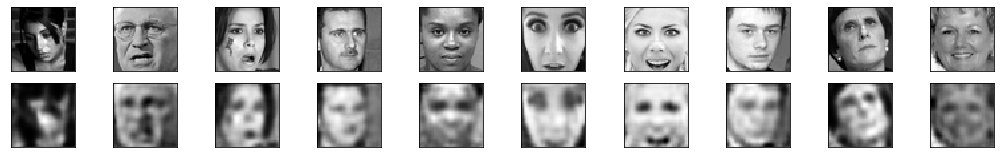

In [50]:
plt.figure(figsize = (18, 4))

for i, image_idx in enumerate(random_test_images):
  ax = plt.subplot(3, num_images, i+1)
  plt.imshow(X_test[image_idx].reshape(48,48))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, num_images, num_images+i+1)
  plt.imshow(autoencode_imgs[image_idx].reshape(48,48))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [51]:
autoencode_imgs.shape

(3589, 48, 48, 1)

==> The result is not good, but if we consider in a large amount of data, it will be OK.

In [53]:
autoencode_imgs = autoencode_imgs.reshape((autoencode_imgs.shape[0], np.product(autoencode_imgs.shape[1:])))
autoencode_imgs.shape

(3589, 2304)

In [0]:
autoencode_imgs_train = autoencoder.predict(X_train)

In [55]:
autoencode_imgs_train = autoencode_imgs_train.reshape((autoencode_imgs_train.shape[0], np.product(autoencode_imgs_train.shape[1:])))
autoencode_imgs_train.shape

(28709, 2304)

In [57]:
autoencode_imgs

array([[0.6113676 , 0.5709585 , 0.47506076, ..., 0.6616606 , 0.57694715,
        0.4634925 ],
       [0.10475263, 0.03967768, 0.03865951, ..., 0.2810178 , 0.278728  ,
        0.28207874],
       [0.90913594, 0.9597108 , 0.96892446, ..., 0.05922428, 0.07008046,
        0.12032977],
       ...,
       [0.24294615, 0.12993273, 0.10566387, ..., 0.7190522 , 0.6940347 ,
        0.6406815 ],
       [0.16802916, 0.10324353, 0.11990425, ..., 0.1604994 , 0.16679275,
        0.19832781],
       [0.12070498, 0.05430564, 0.05761349, ..., 0.5073765 , 0.49783504,
        0.50305   ]], dtype=float32)

In [0]:
temp = []
for i in autoencode_imgs_train:
  string = ''
  for j in i:
    string += str(j) + ' '
  temp.append(string)

temp[0]

In [67]:
len(temp[0])

24256

In [70]:
len(autoencode_imgs_train[0])

2304

==> So, we can use temp to create a series and push to a dataframe to create a new dataset after applying autoencoding for training and testing model.